In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = ['AAPL'], start = '2012-03-11',end = '2022-07-10')

data.head(10)
print(data.shape)
data.head()

[*********************100%%**********************]  1 of 1 completed
(2599, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,19.606428,19.714287,19.535713,19.714287,16.711405,407282400
2012-03-13,19.912144,20.292143,19.848213,20.289286,17.198820,690855200
2012-03-14,20.644644,21.240000,20.549999,21.056429,17.849110,1418844000
2012-03-15,21.414642,21.428928,20.662500,20.912857,17.727400,1159718000
2012-03-16,20.882856,21.042856,20.642857,20.913214,17.727711,825487600


In [2]:
# Adding indicators
# data['RSI']=ta.rsi(data.Close, length=15)
# data['EMAF']=ta.ema(data.Close, length=20)
# data['EMAM']=ta.ema(data.Close, length=100)
# data['EMAS']=ta.ema(data.Close, length=150)

# data['Next Close'] = data['Adj Close'].shift(-7)
# target prediction value: the change in closing price next week
# data['Target'] = data['Next Close'] - data['Adj Close']
data['Target'] = data['Adj Close'].shift(-7)

# data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

# target is next week's closing price
# data['TargetNextClose'] = data['Adj Close'].shift(-7)

# Display the resulting DataFrame
data.dropna(inplace=True)

# Resample to weekly frequency and calculate the mean
# df_weekly = data.resample('W').mean()

# Reset index to make 'date' a column again
# df_weekly.reset_index(inplace=True)
# df_weekly.dropna(inplace=True)
# df_weekly.reset_index(inplace = True)

data.reset_index(inplace = True)

# Target column Categories
# data['y'] =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
# data['yi'] = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
# print(len(yi))

data.drop(['Date'], axis=1, inplace=True) #'Next Close' 'Adj Close', 'Open', 'Close',
# df_weekly.drop(['index', 'Volume', 'Close'], axis=1, inplace=True)
print(data.shape)
# print(df_weekly.head())

(2592, 7)


In [3]:
data_set = data.iloc[:, 0:10] #.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))
# data_set.reset_index(inplace = True, drop=True)
# data_set.head()
# data_set.to_csv('stocks.csv', index=False)

,Open,High,Low,Close,Adj Close,Volume,Target
0,19.606428,19.714287,19.535713,19.714287,16.711405,407282400,18.240253
1,19.912144,20.292143,19.848213,20.289286,17.198820,690855200,18.144575
2,20.644644,21.240000,20.549999,21.056429,17.849110,1418844000,18.044983
3,21.414642,21.428928,20.662500,20.912857,17.727400,1159718000,18.375881
4,20.882856,21.042856,20.642857,20.913214,17.727711,825487600,18.602932
5,21.370358,21.491785,21.037500,21.467857,18.197865,901236000,18.698004
6,21.411072,21.674999,21.124287,21.641430,18.344997,816662000,18.463070
7,21.526428,21.773214,21.478930,21.517857,18.240253,644042000,18.150940
8,21.349285,21.589287,21.268929,21.405001,18.144575,623870800,18.728577
9,21.446072,21.492857,21.228571,21.287500,18.044983,430488800,19.052202


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

c:\users\jonat\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[[0.03407136 0.03226954 0.03496564 ... 0.02806612 0.25797217 0.03716878]
 [0.03588275 0.03569553 0.03685538 ... 0.03096816 0.45769208 0.03659911]
 [0.04022287 0.04131517 0.04109921 ... 0.03483993 0.97041354 0.03600615]
 ...
 [0.74682103 0.75674189 0.76204365 ... 0.76476234 0.03388859 0.77219985]
 [0.76341129 0.76610938 0.76930024 ... 0.76476234 0.02057108 0.79244653]
 [0.76003403 0.76569432 0.74722809 ... 0.73985225 0.0183705  0.7965195 ]]


In [5]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30 # Number of days (or weeks) want to look back
print(data_set_scaled.shape[0])
for j in range(6):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]): #backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# make sure the shape is correct
print(X)
print(X.shape)
# print(y)
print(y.shape)


2592
[[[0.03407136 0.03226954 0.03496564 0.03431335 0.02806612 0.25797217]
  [0.03588275 0.03569553 0.03685538 0.03773469 0.03096816 0.45769208]
  [0.04022287 0.04131517 0.04109921 0.04229932 0.03483993 0.97041354]
  ...
  [0.04491426 0.04343471 0.04306886 0.04184455 0.03445415 0.55901529]
  [0.04304363 0.041294   0.04002368 0.03877172 0.03184779 0.69724515]
  [0.03864849 0.03749323 0.03704328 0.0384997  0.03161703 0.65184888]]

 [[0.03588275 0.03569553 0.03685538 0.03773469 0.03096816 0.45769208]
  [0.04022287 0.04131517 0.04109921 0.04229932 0.03483993 0.97041354]
  [0.04478518 0.04243529 0.04177952 0.04144504 0.03411528 0.78791148]
  ...
  [0.04304363 0.041294   0.04002368 0.03877172 0.03184779 0.69724515]
  [0.03864849 0.03749323 0.03704328 0.0384997  0.03161703 0.65184888]
  [0.0369556  0.03559177 0.03669341 0.03607289 0.02955858 0.72905409]]

 [[0.04022287 0.04131517 0.04109921 0.04229932 0.03483993 0.97041354]
  [0.04478518 0.04243529 0.04177952 0.04144504 0.03411528 0.78791148]

In [6]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [7]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

2049
(2049, 30, 6)
(513, 30, 6)
(2049, 1)
(513, 1)


In [8]:
# !pip install --upgrade tensorflow-probability

[Tensorflow probability documentation](https://www.tensorflow.org/probability/examples/Probabilistic_Layers_Regression)

In [9]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed
import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

print(type(X_train))
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
# inputs = LSTM(150, name='first_layer')(lstm_input)
# inputs = Dense(1, name='dense_layer')(inputs)
# output = Activation('linear', name='output')(inputs)
# model = Model(inputs=lstm_input, outputs=output)
# adam = optimizers.Adam()
# model.compile(optimizer=adam, loss='mse')

negloglik = lambda y, rv_y: -rv_y.log_prob(y)


model = Sequential()
model.add(LSTM(150, name='first_layer', return_sequences=True, input_shape = (backcandles, 6)))
model.add(LSTM(150, name='second_layer'))
model.add(Dense(2, activation='relu')) # 2 as you want to predict mean and variance
model.add(  tfp.layers.DistributionLambda(
      lambda t: tfd.Normal(loc=t[..., :1],
                           scale=1e-3 + tf.math.softplus(0.05 * t[...,1:])))) # note this

model.compile(optimizer='adam', loss=negloglik) # metrics=[keras.metrics.Accuracy()]
model.summary()




<class 'numpy.ndarray'>


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (LSTM)          (None, 30, 150)           94200     
                                                                 
 second_layer (LSTM)         (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 2)                 302       
                                                                 
 distribution_lambda (Distr  ((None, 1),               0         
 ibutionLambda)               (None, 1))                         
                                                                 
Total params: 275102 (1.05 MB)
Trainable params: 275102 (1.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# model.fit(x=X_train, y=y_train, batch_size=15, epochs=15, shuffle=True, validation_split = 0.1)
model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test,y_test),verbose=1)

Epoch 1/10

65/65 [==============================] - 14s 104ms/step - loss: 0.5548 - val_loss: 0.5570
Epoch 2/10
65/65 [==============================] - 5s 83ms/step - loss: 0.5541 - val_loss: 0.5571
Epoch 3/10
65/65 [==============================] - 5s 79ms/step - loss: 0.5541 - val_loss: 0.5566
Epoch 4/10
65/65 [==============================] - 5s 70ms/step - loss: 0.5541 - val_loss: 0.5580
Epoch 5/10
65/65 [==============================] - 5s 81ms/step - loss: 0.5541 - val_loss: 0.5565
Epoch 6/10
65/65 [==============================] - 6s 93ms/step - loss: 0.5541 - val_loss: 0.5604
Epoch 7/10
65/65 [==============================] - 5s 84ms/step - loss: 0.5541 - val_loss: 0.5759
Epoch 8/10
65/65 [==============================] - 6s 86ms/step - loss: 0.5541 - val_loss: 0.5564
Epoch 9/10
65/65 [==============================] - 5s 79ms/step - loss: 0.5541 - val_loss: 0.5564
Epoch 10/10
65/65 [==============================] - 5s 77ms/step - loss: 0.5540 - val_loss: 0.5587


In [11]:
# model.evaluate(X_test, y_test)
# # access validation accuracy for each epoch
# model.metrics_names
# # acc = model.history.history['val_accuracy']
# # print(acc)

# # # access validation loss for each epoch
# # loss_val = model.history.history['val_loss']
# # print(loss_val)

<class 'tensorflow.python.framework.ops.EagerTensor'>


Text(0.5, 1.0, 'Tensorflow probability implementation')

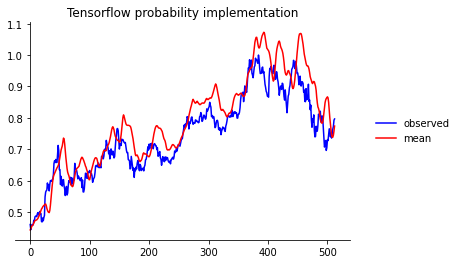

In [12]:
# representing aleatoric uncertainty from tfp documentation
# [print(np.squeeze(w.numpy())) for w in model.weights];
yhat = model(X_test)
assert isinstance(yhat, tfd.Distribution)

plt.plot(np.arange(len(X_test)), y_test, 'b', label='observed');

m = yhat.mean()
print(type(m))
s = yhat.stddev()

plt.plot(np.arange(len(X_test)), m, 'r', label='mean');
# confidence interval is extremely wide
# plt.plot(np.arange(len(X_test)), m + 2 * s, 'g', linewidth=2, label=r'mean + 2 stddev');
# plt.plot(np.arange(len(X_test)), m - 2 * s, 'g', linewidth=2, label=r'mean - 2 stddev');

ax=plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))
plt.title('Tensorflow probability implementation')

In [13]:
# implement a default model that predicts change in price only
model2 = Sequential()
model2.add(LSTM(150, name='first_layer', return_sequences=True, input_shape = (backcandles, 6)))
model2.add(LSTM(150, name='second_layer'))
model2.add(Dense(1, activation='relu'))
model2.compile(optimizer='adam', loss='mse') # metrics=[keras.metrics.Accuracy()]
model2.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test,y_test), verbose=1)

Epoch 1/10
65/65 [==============================] - 14s 99ms/step - loss: 9.2601e-04 - val_loss: 0.0048
Epoch 2/10
65/65 [==============================] - 5s 73ms/step - loss: 2.3914e-04 - val_loss: 0.0039
Epoch 3/10
65/65 [==============================] - 6s 86ms/step - loss: 2.2540e-04 - val_loss: 0.0026
Epoch 4/10
65/65 [==============================] - 5s 73ms/step - loss: 2.0041e-04 - val_loss: 0.0037
Epoch 5/10
65/65 [==============================] - 5s 80ms/step - loss: 1.8603e-04 - val_loss: 0.0085
Epoch 6/10
65/65 [==============================] - 5s 71ms/step - loss: 1.8607e-04 - val_loss: 0.0487
Epoch 7/10
65/65 [==============================] - 7s 102ms/step - loss: 0.0010 - val_loss: 0.0022
Epoch 8/10
65/65 [==============================] - 5s 80ms/step - loss: 1.9675e-04 - val_loss: 0.0031
Epoch 9/10
65/65 [==============================] - 5s 82ms/step - loss: 1.6149e-04 - val_loss: 0.0028
Epoch 10/10
65/65 [==============================] - 5s 72ms/step - loss: 1

17/17 [==============================] - 2s 23ms/step
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Default MSE loss function implementation')

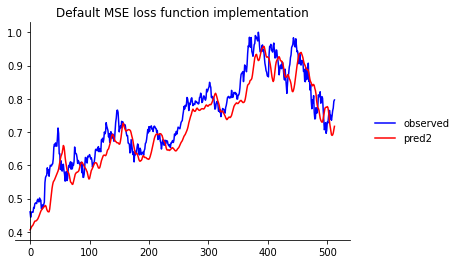

In [14]:
yhat2 = model2.predict(X_test)
print(type(yhat2))
plt.plot(np.arange(len(X_test)), y_test, 'b', label='observed');
plt.plot(np.arange(len(X_test)), yhat2, 'r', label='pred2');

ax=plt.gca();
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
plt.legend(loc='center left', fancybox=True, framealpha=0., bbox_to_anchor=(1.05, 0.5))
plt.title("Default MSE loss function implementation")